# Time Series Trend and Categorical Feature Encoding Analysis

## Project Overview

This project presents an analytical workflow focused on:

- Linear trend modeling using multiple libraries
- Comparison of regression implementations
- Encoding categorical variables for machine learning
- Automated EDA reporting
- Seasonality and trend decomposition using STL and MSTL

The goal is to demonstrate practical preprocessing and modeling techniques used in real-world machine learning pipelines.

In [35]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [37]:
df = pd.read_csv('bikes_data.csv').drop('Unnamed: 0', axis=1)

## 1. Data Loading and Initial Inspection

The dataset is loaded and prepared for time-based analysis.  
Key preprocessing steps include:

- Converting date columns to datetime
- Checking dataset structure
- Verifying data consistency

This ensures the dataset is ready for regression and seasonal analysis.

In [39]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df['required_date']=pd.to_datetime(df['required_date'], format='%Y-%m-%d')
df['shipped_date']=pd.to_datetime(df['shipped_date'], format='%Y-%m-%d')

## 2. Linear Trend Modeling

This section explores linear regression trendlines using different approaches:

- Plotly built-in trendline
- Statsmodels OLS regression
- Scikit-learn LinearRegression
- Seaborn regression plots

The purpose is to compare implementations and understand how trend estimation may differ depending on the method.

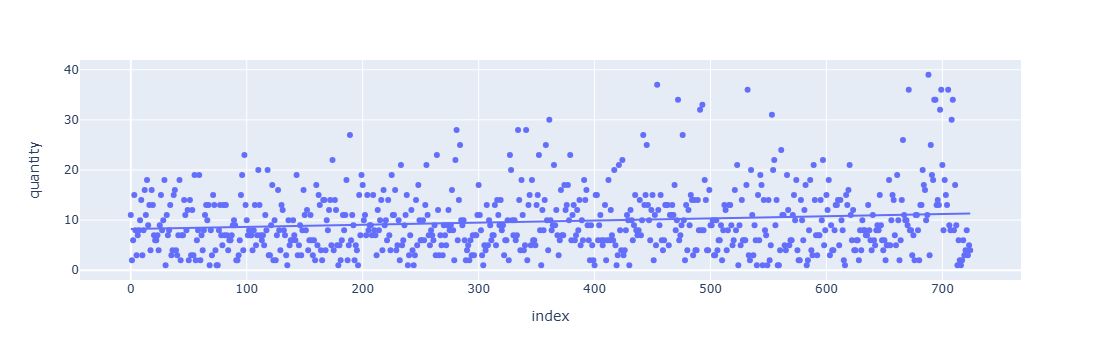

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

df_grouped = df.groupby('order_date').agg({'quantity':'sum'}).reset_index()

fig=px.scatter(df_grouped,
            y='quantity',
            trendline='ols')
fig.show()

### Plotly Trendline Interpretation

The trendline generated by Plotly provides a quick linear regression estimate.

However, when using date values directly, the model may implicitly convert them into numerical timestamps, which can introduce scaling issues and interpretation errors.

This highlights the importance of proper feature engineering in regression modeling.

### Statsmodels OLS Regression

Using statsmodels allows direct access to:

- Regression coefficients
- Statistical significance (p-values)
- R-squared metric
- Confidence intervals

This approach provides deeper statistical insight compared to visualization-based trendlines.

In [ ]:
import statsmodels.api as sm

x=sm.add_constant(df_grouped.index)
y=df_grouped['quantity']

model_reg_lin = sm.OLS(y, x).fit()

print(model_reg_lin.summary())

fig=px.scatter(df_grouped, y='quantity')
fig.add_trace(go.Line(x=df_grouped.index,
                    y=model_reg_lin.predict(x)))
fig.show()

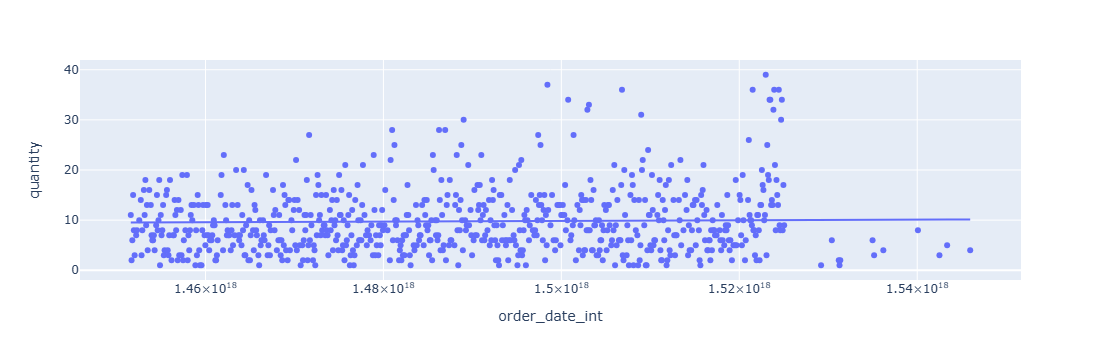

In [ ]:
df_grouped['order_date_int']=df_grouped['order_date'].values.astype(float)
fig=px.scatter(df_grouped,
            x='order_date_int',
            y='quantity',
            trendline='ols')
fig.show()

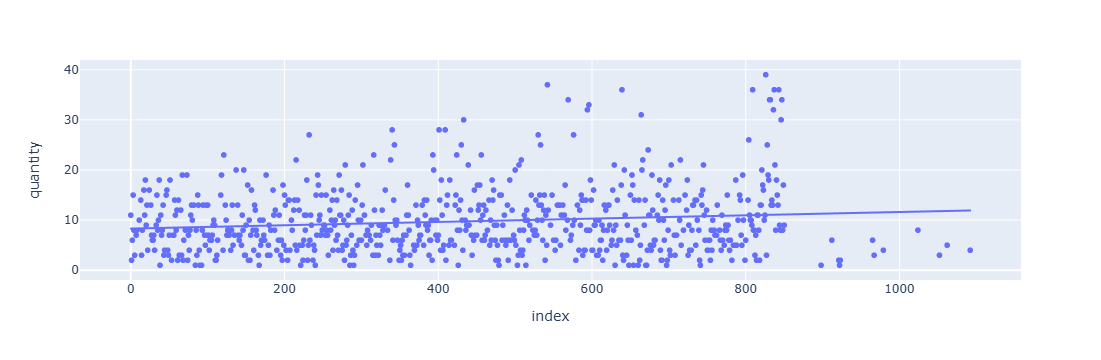

In [ ]:
import numpy as np

df_miss_day=pd.DataFrame()
df_miss_day['miss_date']=np.arange(df['order_date'].min(),
                                    df['order_date'].max()+(np.datetime64('2020-01-02')-np.datetime64('2020-01-01')),
                                    np.datetime64('2020-01-02')-np.datetime64('2020-01-01'))

df_grouped_missdays_null = df_grouped.merge(df_miss_day, how='outer', left_on='order_date', right_on='miss_date').sort_values(by='miss_date')
df_grouped_missdays_null=df_grouped_missdays_null.sort_values(by='miss_date').reset_index().drop('index', axis=1)

fig=px.scatter(df_grouped_missdays_null,
            y='quantity',
            trendline='ols')
fig.show()

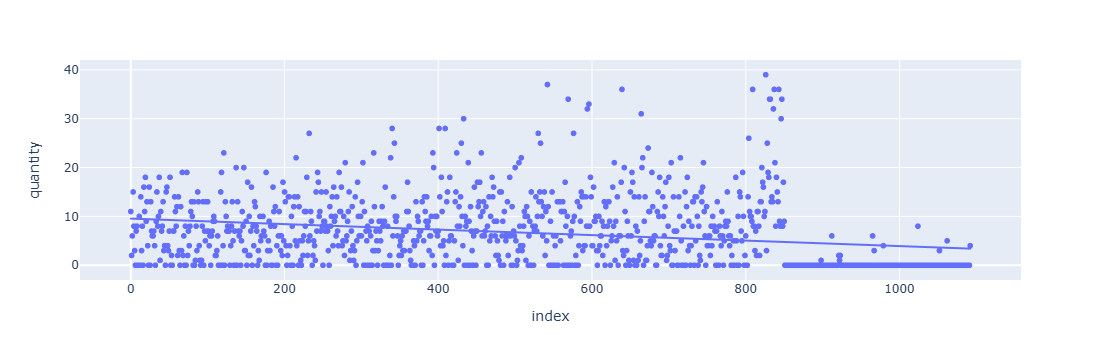

In [ ]:
df_grouped_missdays_null['quantity']=df_grouped_missdays_null['quantity'].fillna(0)

fig=px.scatter(df_grouped_missdays_null,
            y='quantity',
            trendline='ols')
fig.show()

### Scikit-learn Linear Regression

Here, the trendline is manually calculated using sklearn.

Steps:
- Convert date to numeric format
- Fit LinearRegression model
- Predict values
- Overlay regression line on plot

This reflects how regression is typically implemented inside ML pipelines.

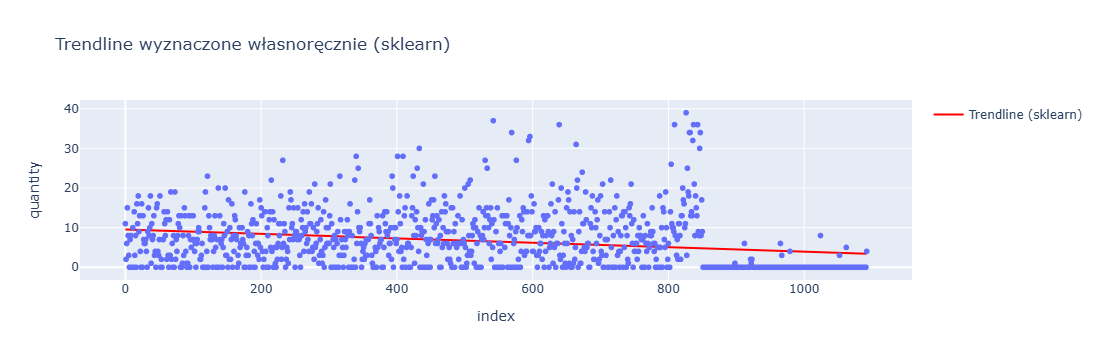

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

df_grouped_missdays_null['quantity'] = df_grouped_missdays_null['quantity'].fillna(0)

X = df_grouped_missdays_null.index.values.reshape(-1, 1) 
y = df_grouped_missdays_null['quantity'].values          

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

fig = px.scatter(df_grouped_missdays_null, 
                x=df_grouped_missdays_null.index, 
                y='quantity', 
                title="Trendline wyznaczone własnoręcznie (sklearn)")

fig.add_trace(go.Scatter(x=df_grouped_missdays_null.index, 
                        y=y_pred, 
                        mode='lines', 
                        name='Trendline (sklearn)',
                        line=dict(color='red')))
fig.show()

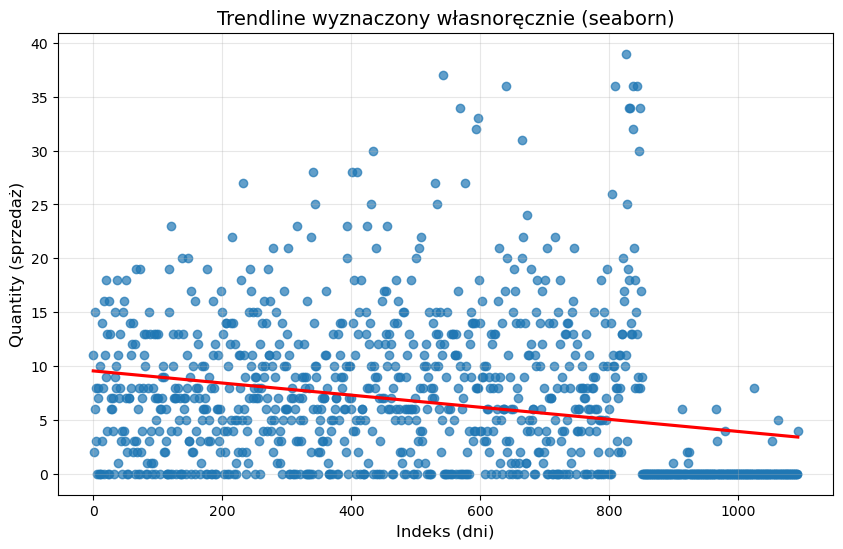

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_grouped_missdays_null['quantity'] = df_grouped_missdays_null['quantity'].fillna(0)

plt.figure(figsize=(10, 6))
sns.regplot(x=df_grouped_missdays_null.index,
            y=df_grouped_missdays_null['quantity'],
            line_kws={"color": "red"},
            scatter_kws={"alpha": 0.7},
            ci=None)

plt.title("Trendline wyznaczony własnoręcznie (seaborn)", fontsize=14)
plt.xlabel("Indeks (dni)", fontsize=12)
plt.ylabel("Quantity (sprzedaż)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [43]:
from collections import Counter

print("Counter -staff_id: ",Counter(df['staff_id']))
print("Counter -store_id: ",Counter(df['store_id']))
print("Counter -product_id: ",Counter(df['product_id']))

Counter -staff_id:  Counter({6: 1615, 7: 1580, 3: 544, 2: 462, 8: 269, 9: 252})
Counter -store_id:  Counter({2: 3195, 1: 1006, 3: 521})
Counter -product_id:  Counter({6: 110, 12: 104, 13: 103, 9: 101, 7: 101, 23: 100, 25: 98, 10: 97, 4: 97, 11: 97, 16: 95, 22: 94, 17: 91, 15: 91, 5: 91, 26: 90, 21: 90, 18: 89, 24: 89, 3: 86, 14: 86, 8: 85, 20: 84, 19: 78, 2: 77, 65: 35, 45: 32, 95: 31, 36: 29, 103: 28, 56: 28, 48: 28, 91: 28, 100: 28, 106: 27, 78: 27, 52: 26, 55: 26, 71: 26, 101: 26, 58: 26, 28: 26, 92: 26, 61: 25, 62: 25, 102: 25, 43: 25, 105: 25, 93: 25, 99: 24, 42: 24, 29: 24, 41: 24, 66: 24, 81: 24, 60: 24, 88: 23, 82: 23, 72: 22, 32: 22, 30: 22, 97: 22, 33: 22, 49: 22, 70: 22, 85: 21, 63: 21, 108: 21, 40: 21, 27: 21, 77: 21, 73: 20, 109: 20, 64: 20, 50: 20, 104: 20, 96: 20, 37: 20, 68: 19, 94: 19, 74: 19, 51: 19, 87: 19, 46: 19, 76: 18, 90: 18, 59: 18, 69: 18, 38: 18, 89: 18, 75: 18, 111: 18, 53: 17, 54: 17, 35: 17, 79: 16, 67: 16, 110: 16, 39: 16, 84: 16, 107: 16, 44: 16, 83: 15,

In [45]:
df['staff_id'] = df['staff_id'].apply(lambda x: 'staff_{}'.format(x))

In [47]:
print("Counter -staff_id: ",Counter(df['staff_id']))

Counter -staff_id:  Counter({'staff_6': 1615, 'staff_7': 1580, 'staff_3': 544, 'staff_2': 462, 'staff_8': 269, 'staff_9': 252})


## 3. Categorical Feature Encoding

Machine learning models require numerical input.  
Categorical variables must therefore be encoded.

This section compares:

- pd.get_dummies (One-Hot Encoding)
- LabelEncoder
- OneHotEncoder
- LabelBinarizer

Each method has different implications for model interpretation and bias.

In [49]:
pd.get_dummies(df[['staff_id']],
               prefix=['staff_id_'])

,staff_id__staff_2,staff_id__staff_3,staff_id__staff_6,staff_id__staff_7,staff_id__staff_8,staff_id__staff_9
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
4717,0,0,0,0,1,0
4718,0,0,0,0,1,0
4719,0,0,0,0,1,0
4720,0,0,0,0,1,0


### Label Encoding – Considerations

LabelEncoder assigns integer values to categories.

⚠ Limitation:
For nominal variables (like store_id), numeric encoding may introduce artificial ordinal relationships.

Therefore, LabelEncoder should be used carefully.

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['staff_id'].unique())

print("jakie klasy zna nasz encoder: ", le.classes_)
print("jak zostaną przekształcone: ", le.transform(['staff_6']))
print("inwersja: ", le.inverse_transform([0,1,2,3]))

jakie klasy zna nasz encoder:  ['staff_2' 'staff_3' 'staff_6' 'staff_7' 'staff_8' 'staff_9']
jak zostaną przekształcone:  [2]
inwersja:  ['staff_2' 'staff_3' 'staff_6' 'staff_7']


In [ ]:
encoded_dummies = pd.get_dummies(df[['staff_id']], prefix=['staff_id'])
print(encoded_dummies.head())

   staff_id_staff_2  staff_id_staff_3  staff_id_staff_6  staff_id_staff_7  \
0                 1                 0                 0                 0   
1                 1                 0                 0                 0   
2                 1                 0                 0                 0   
3                 1                 0                 0                 0   
4                 1                 0                 0                 0   

   staff_id_staff_8  staff_id_staff_9  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  


In [ ]:
import pandas as pd

staff_dummies = pd.get_dummies(df['staff_id'], prefix='staff')
store_dummies = pd.get_dummies(df['store_id'], prefix='store')

df = pd.concat([df, staff_dummies, store_dummies], axis=1)

print(df)

      order_id  customer_id  order_status order_date required_date  \
0            1          259             4 2016-01-01    2016-01-03   
1            1          259             4 2016-01-01    2016-01-03   
2            1          259             4 2016-01-01    2016-01-03   
3            1          259             4 2016-01-01    2016-01-03   
4            1          259             4 2016-01-01    2016-01-03   
...        ...          ...           ...        ...           ...   
4717      1614          135             3 2018-11-28    2018-11-28   
4718      1614          135             3 2018-11-28    2018-11-28   
4719      1615          136             3 2018-12-28    2018-12-28   
4720      1615          136             3 2018-12-28    2018-12-28   
4721      1615          136             3 2018-12-28    2018-12-28   

     shipped_date  store_id staff_id first_name  last_name  ... discount  \
0      2016-01-03         1  staff_2  Johnathan  Velazquez  ...     0.20   
1      

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_staff = LabelEncoder()
label_encoder_store = LabelEncoder()

df['staff_id_encoded'] = label_encoder_staff.fit_transform(df['staff_id'])
df['store_id_encoded'] = label_encoder_store.fit_transform(df['store_id'])

print(df)

      order_id  customer_id  order_status order_date required_date  \
0            1          259             4 2016-01-01    2016-01-03   
1            1          259             4 2016-01-01    2016-01-03   
2            1          259             4 2016-01-01    2016-01-03   
3            1          259             4 2016-01-01    2016-01-03   
4            1          259             4 2016-01-01    2016-01-03   
...        ...          ...           ...        ...           ...   
4717      1614          135             3 2018-11-28    2018-11-28   
4718      1614          135             3 2018-11-28    2018-11-28   
4719      1615          136             3 2018-12-28    2018-12-28   
4720      1615          136             3 2018-12-28    2018-12-28   
4721      1615          136             3 2018-12-28    2018-12-28   

     shipped_date  store_id staff_id first_name  last_name  ... staff_staff_3  \
0      2016-01-03         1  staff_2  Johnathan  Velazquez  ...             0 

### One-Hot Encoding – Advantages

One-hot encoding avoids introducing artificial order.

It is preferred for:
- Tree-based models
- Linear models
- Neural networks

Trade-off:
- Increases dimensionality

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
encoded_store = one_hot_encoder.fit_transform(df[['store_id']])
encoded_store_df = pd.DataFrame(encoded_store, columns=one_hot_encoder.categories_[0], index=df.index)

df = pd.concat([df, encoded_store_df], axis=1)

print(df)

      order_id  customer_id  order_status order_date required_date  \
0            1          259             4 2016-01-01    2016-01-03   
1            1          259             4 2016-01-01    2016-01-03   
2            1          259             4 2016-01-01    2016-01-03   
3            1          259             4 2016-01-01    2016-01-03   
4            1          259             4 2016-01-01    2016-01-03   
...        ...          ...           ...        ...           ...   
4717      1614          135             3 2018-11-28    2018-11-28   
4718      1614          135             3 2018-11-28    2018-11-28   
4719      1615          136             3 2018-12-28    2018-12-28   
4720      1615          136             3 2018-12-28    2018-12-28   
4721      1615          136             3 2018-12-28    2018-12-28   

     shipped_date  store_id staff_id first_name  last_name  ... staff_staff_8  \
0      2016-01-03         1  staff_2  Johnathan  Velazquez  ...             0 

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
encoded_staff = label_binarizer.fit_transform(df['staff_id'])
staff_encoded_df = pd.DataFrame(encoded_staff, columns=['staff_id_' + str(i) for i in range(encoded_staff.shape[1])], index=df.index)
df = pd.concat([df, staff_encoded_df], axis=1)

print(df)

      order_id  customer_id  order_status order_date required_date  \
0            1          259             4 2016-01-01    2016-01-03   
1            1          259             4 2016-01-01    2016-01-03   
2            1          259             4 2016-01-01    2016-01-03   
3            1          259             4 2016-01-01    2016-01-03   
4            1          259             4 2016-01-01    2016-01-03   
...        ...          ...           ...        ...           ...   
4717      1614          135             3 2018-11-28    2018-11-28   
4718      1614          135             3 2018-11-28    2018-11-28   
4719      1615          136             3 2018-12-28    2018-12-28   
4720      1615          136             3 2018-12-28    2018-12-28   
4721      1615          136             3 2018-12-28    2018-12-28   

     shipped_date  store_id staff_id first_name  last_name  ...  \
0      2016-01-03         1  staff_2  Johnathan  Velazquez  ...   
1      2016-01-03        

## 4. Automated Exploratory Data Analysis

Automated EDA tools provide quick insights into:

- Variable distributions
- Correlations
- Missing values
- Target relationships

Sweetviz generates an interactive HTML report summarizing the dataset.

In [ ]:
pip install sweetviz

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources>=1.2.0 from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 991.0 kB/s eta 0:00:16
   ---------------------------------------- 0.1/15.1 MB 1.5 MB/s eta 0:00:11
   ---------------------------------------- 0.2/15.1 MB 1.7 MB/s eta 0:00:09
    --------------------------------------- 0.3/15.1 MB 2.2 MB/s eta 0:00:07
   - -------------------------------------- 0.6/15.1 MB 3.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/15.1 MB 3.5 MB/s eta 0:00:05
   -- -----------------------------

In [17]:
from pandasgui import show

In [25]:
show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [ ]:
import sweetviz as sv

sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

In [ ]:
pip install dabl

Note: you may need to restart the kernel to use updated packages.


In [31]:
print(df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_date',
       'required_date', 'shipped_date', 'store_id', 'staff_id', 'first_name',
       'last_name', 'phone', 'email', 'street', 'city', 'state', 'zip_code',
       'item_id', 'product_id', 'quantity', 'list_price', 'discount'],
      dtype='object')


Target looks like classification
Linear Discriminant Analysis training set score: 0.506


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='quantity'>,
 [<Figure size 1200x400 with 6 Axes>,
  array([[<Axes: title={'center': '0.502'}, xlabel='discount', ylabel='list_price'>,
          <Axes: title={'center': '0.499'}, xlabel='customer_id', ylabel='product_id'>,
          <Axes: title={'center': '0.499'}, xlabel='zip_code', ylabel='order_id'>,
          <Axes: title={'center': '0.499'}, xlabel='zip_code', ylabel='discount'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 array([[<Axes: title={'center': 'item_id'}>,
         <Axes: title={'center': 'staff_id'}>,
         <Axes: title={'center': 'order_status'}>,
         <Axes: title={'center': 'state'}>,
         <Axes: title={'center': 'store_id'}>]], dtype=object)]

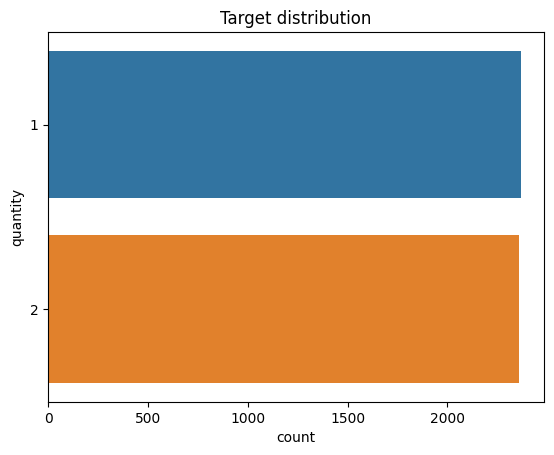

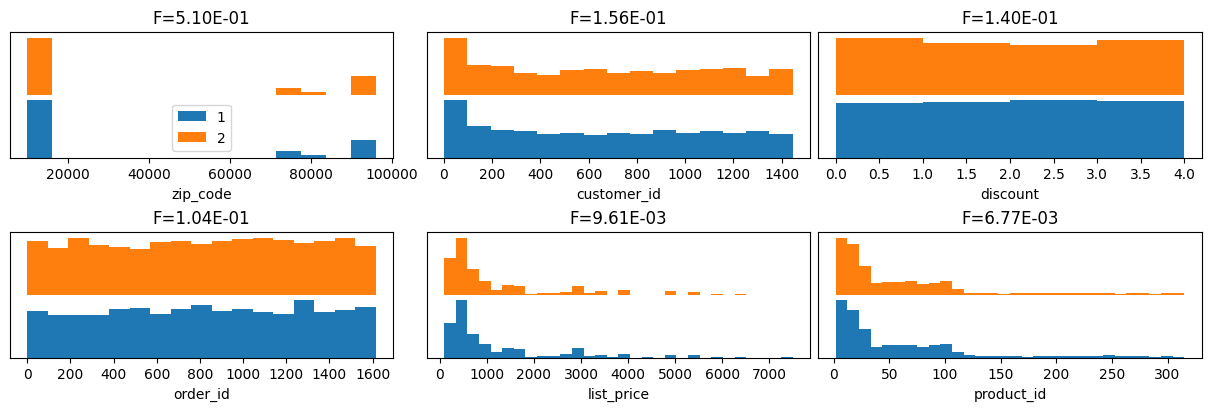

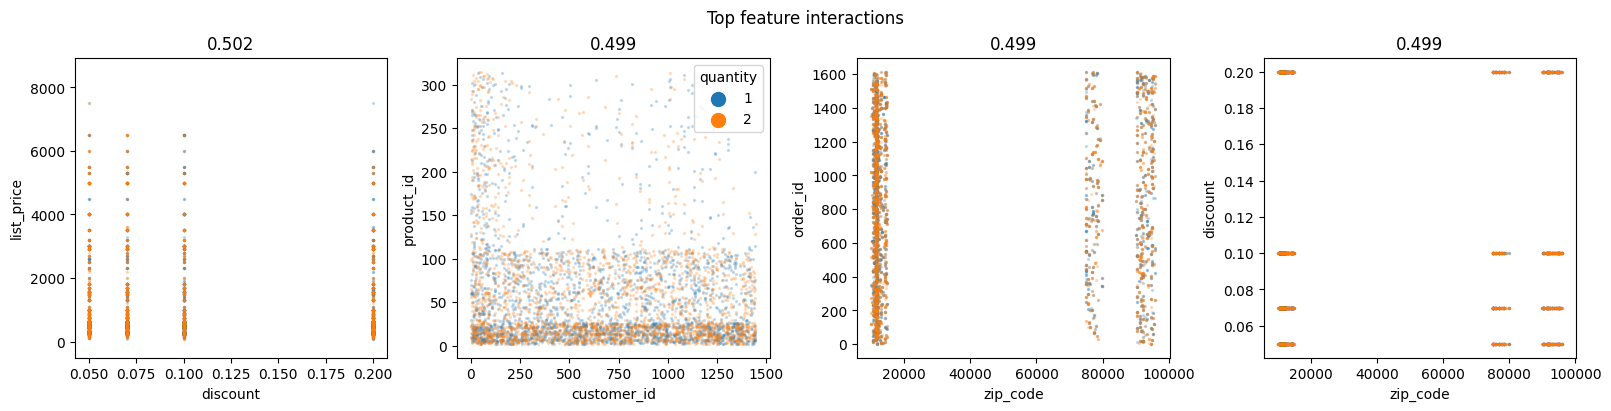

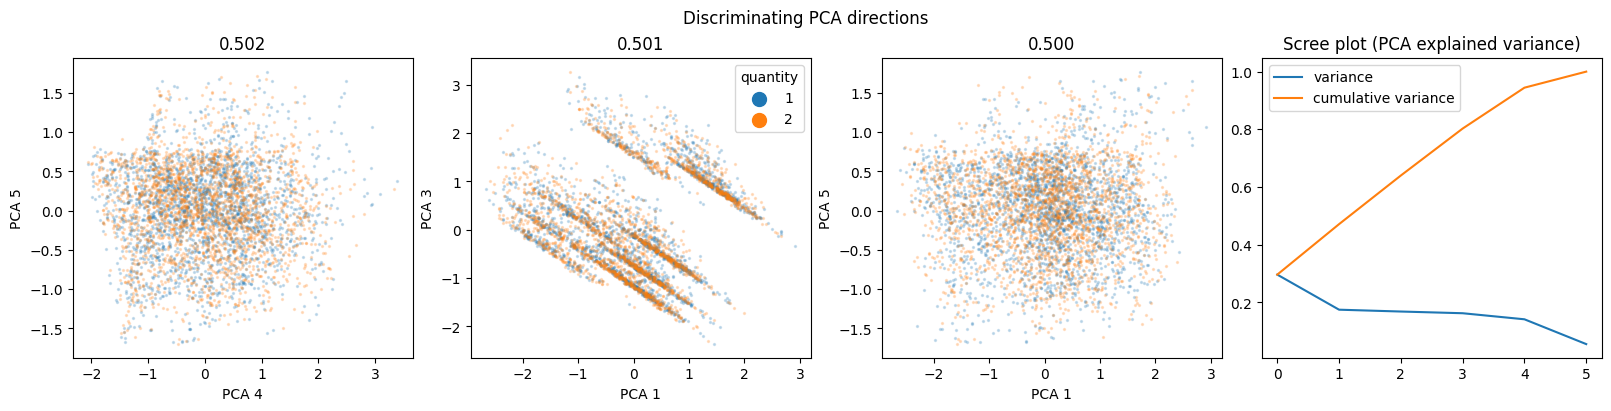

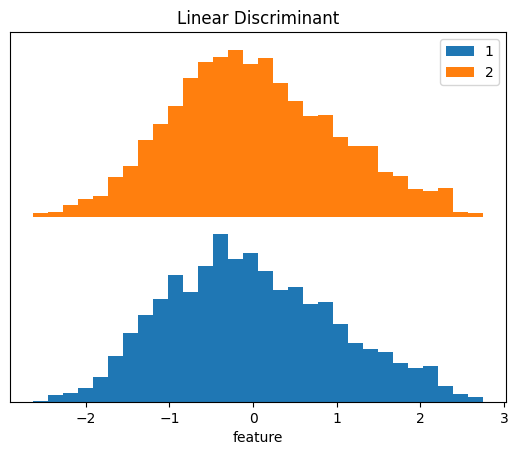

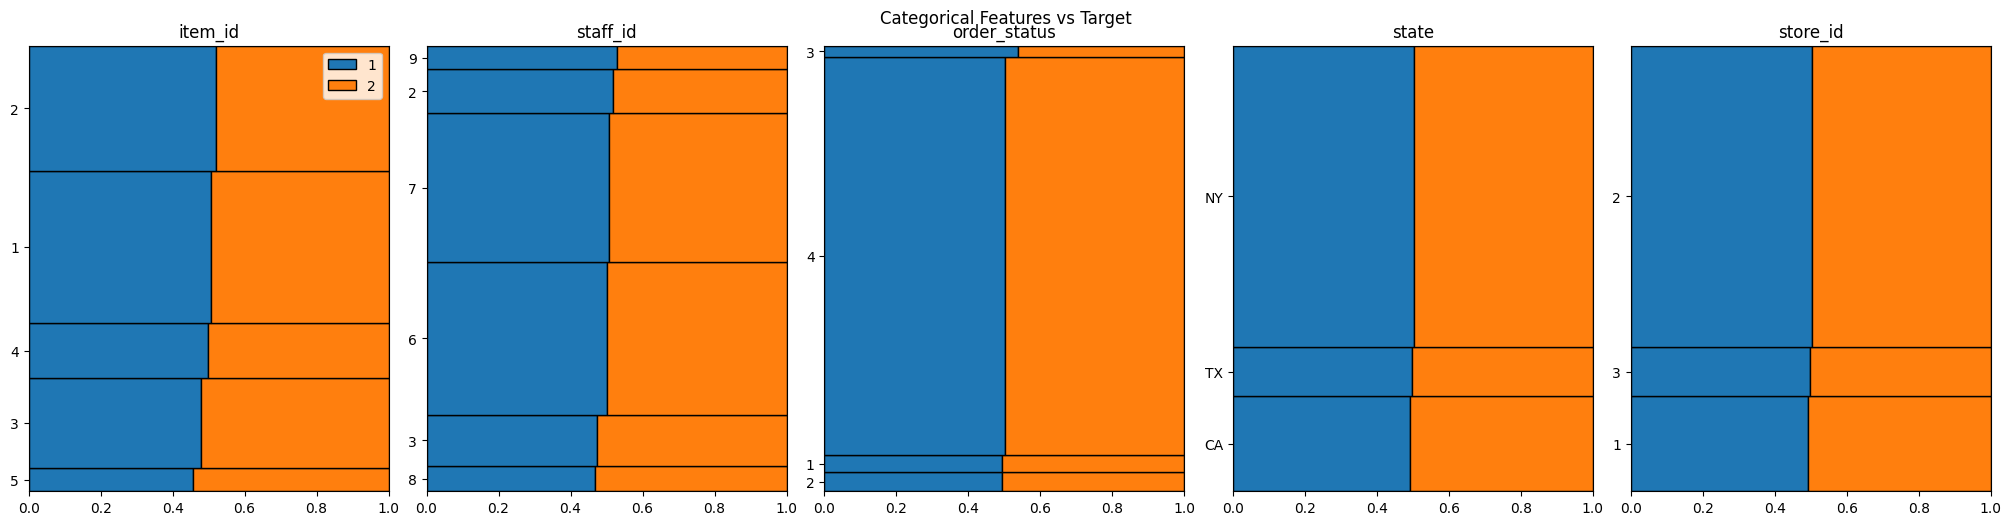

In [33]:
import dabl
dabl.plot(df, target_col='quantity')

In [ ]:
import numpy as np

df['value']=df['quantity']*df['list_price']*(1-df['discount'])
df_grouped = df.groupby('order_date').agg({'quantity':'sum', 'value':'sum'}).reset_index()

df_miss_day=pd.DataFrame()
df_miss_day['miss_date']=np.arange(df['order_date'].min(),
                                    df['order_date'].max()+(np.datetime64('2020-01-02')-np.datetime64('2020-01-01')),
                                    np.datetime64('2020-01-02')-np.datetime64('2020-01-01'))

df_grouped_missdays_null = df_grouped.merge(df_miss_day, how='outer', left_on='order_date', right_on='miss_date').sort_values(by='miss_date')
df_grouped_missdays_null=df_grouped_missdays_null.sort_values(by='miss_date').reset_index().drop('index', axis=1)

df_grouped_missdays_null['quantity']=df_grouped_missdays_null['quantity'].fillna(0)
df_grouped_missdays_null['value']=df_grouped_missdays_null['value'].fillna(0)

series_week=df_grouped_missdays_null.groupby([pd.Grouper(key='miss_date', freq='W')])['value'].sum()
series_month=df_grouped_missdays_null.groupby([pd.Grouper(key='miss_date', freq='M')])['value'].sum()

## 5. Seasonality and Trend Decomposition

Time series data often consists of:

- Trend component
- Seasonal component
- Residual component

Using STL and MSTL allows decomposition of the series into interpretable components.

This step is crucial for forecasting and anomaly detection.

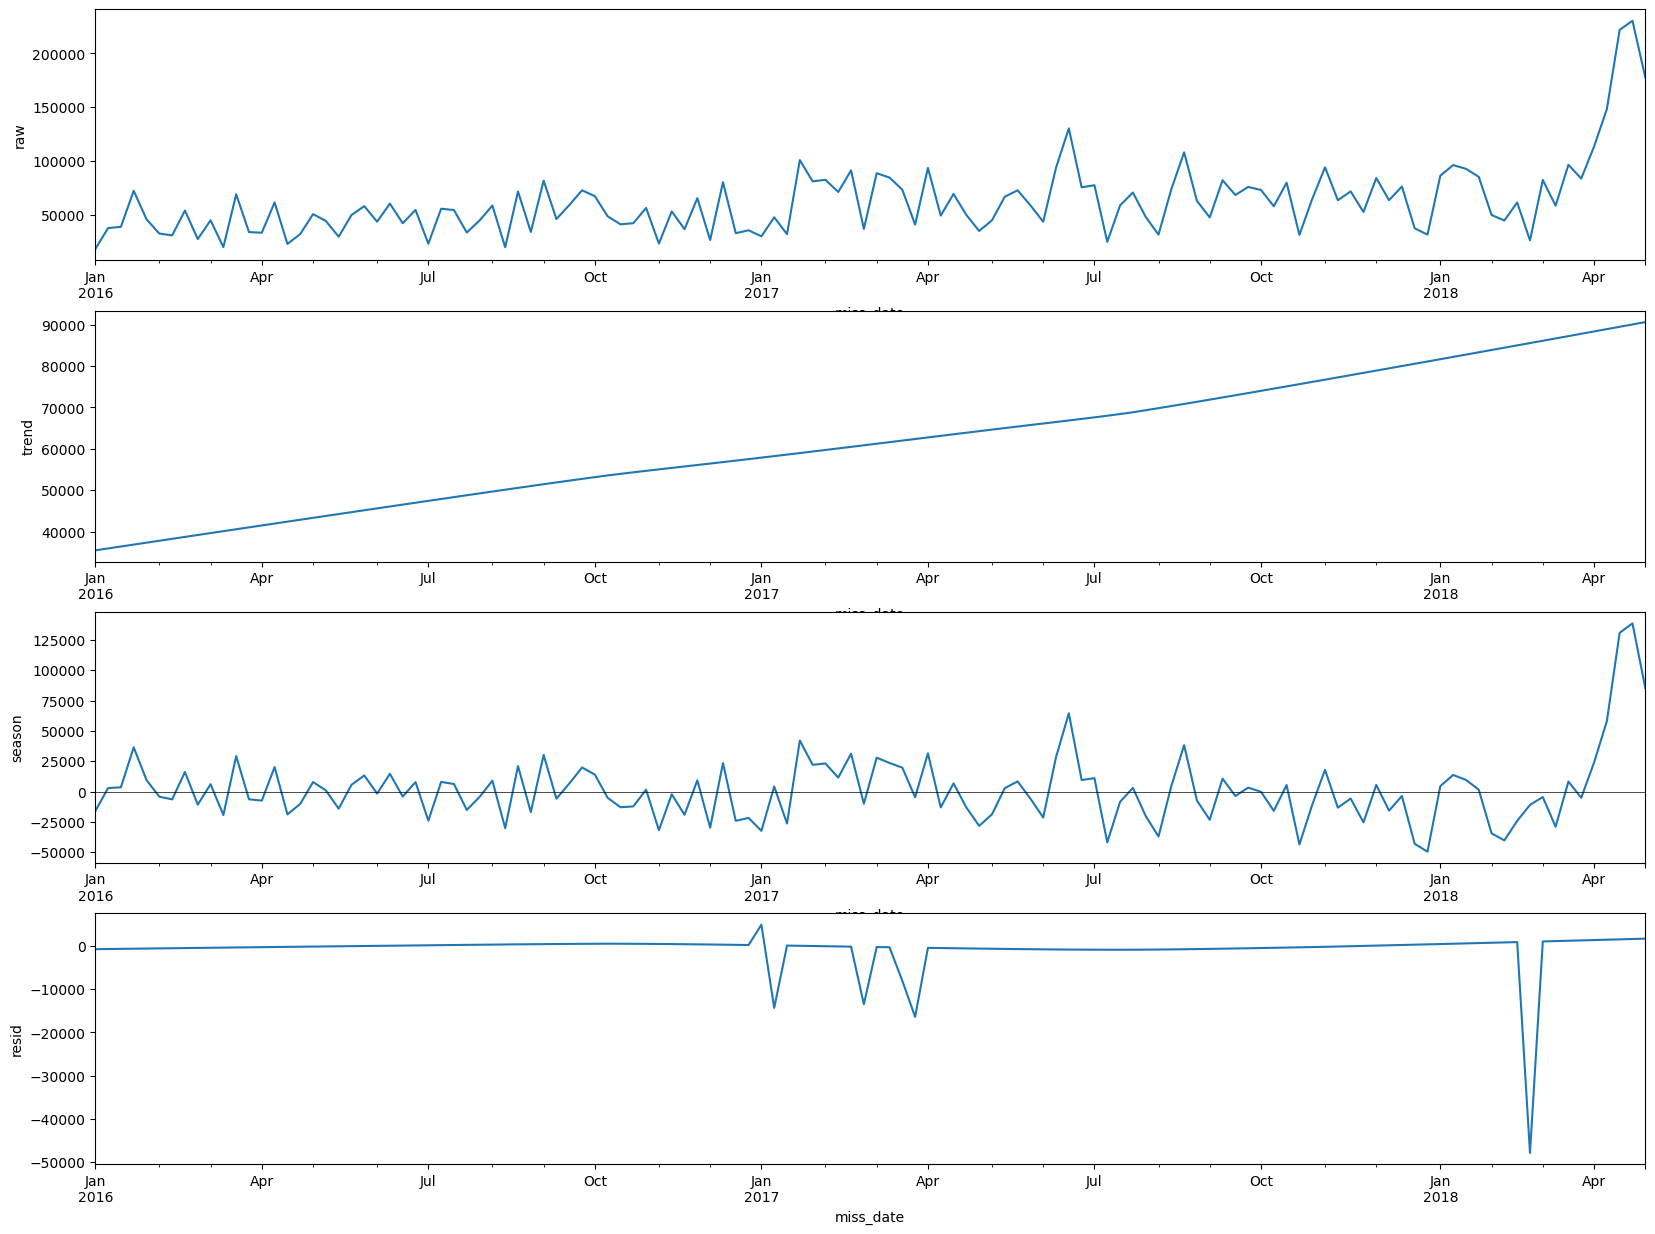

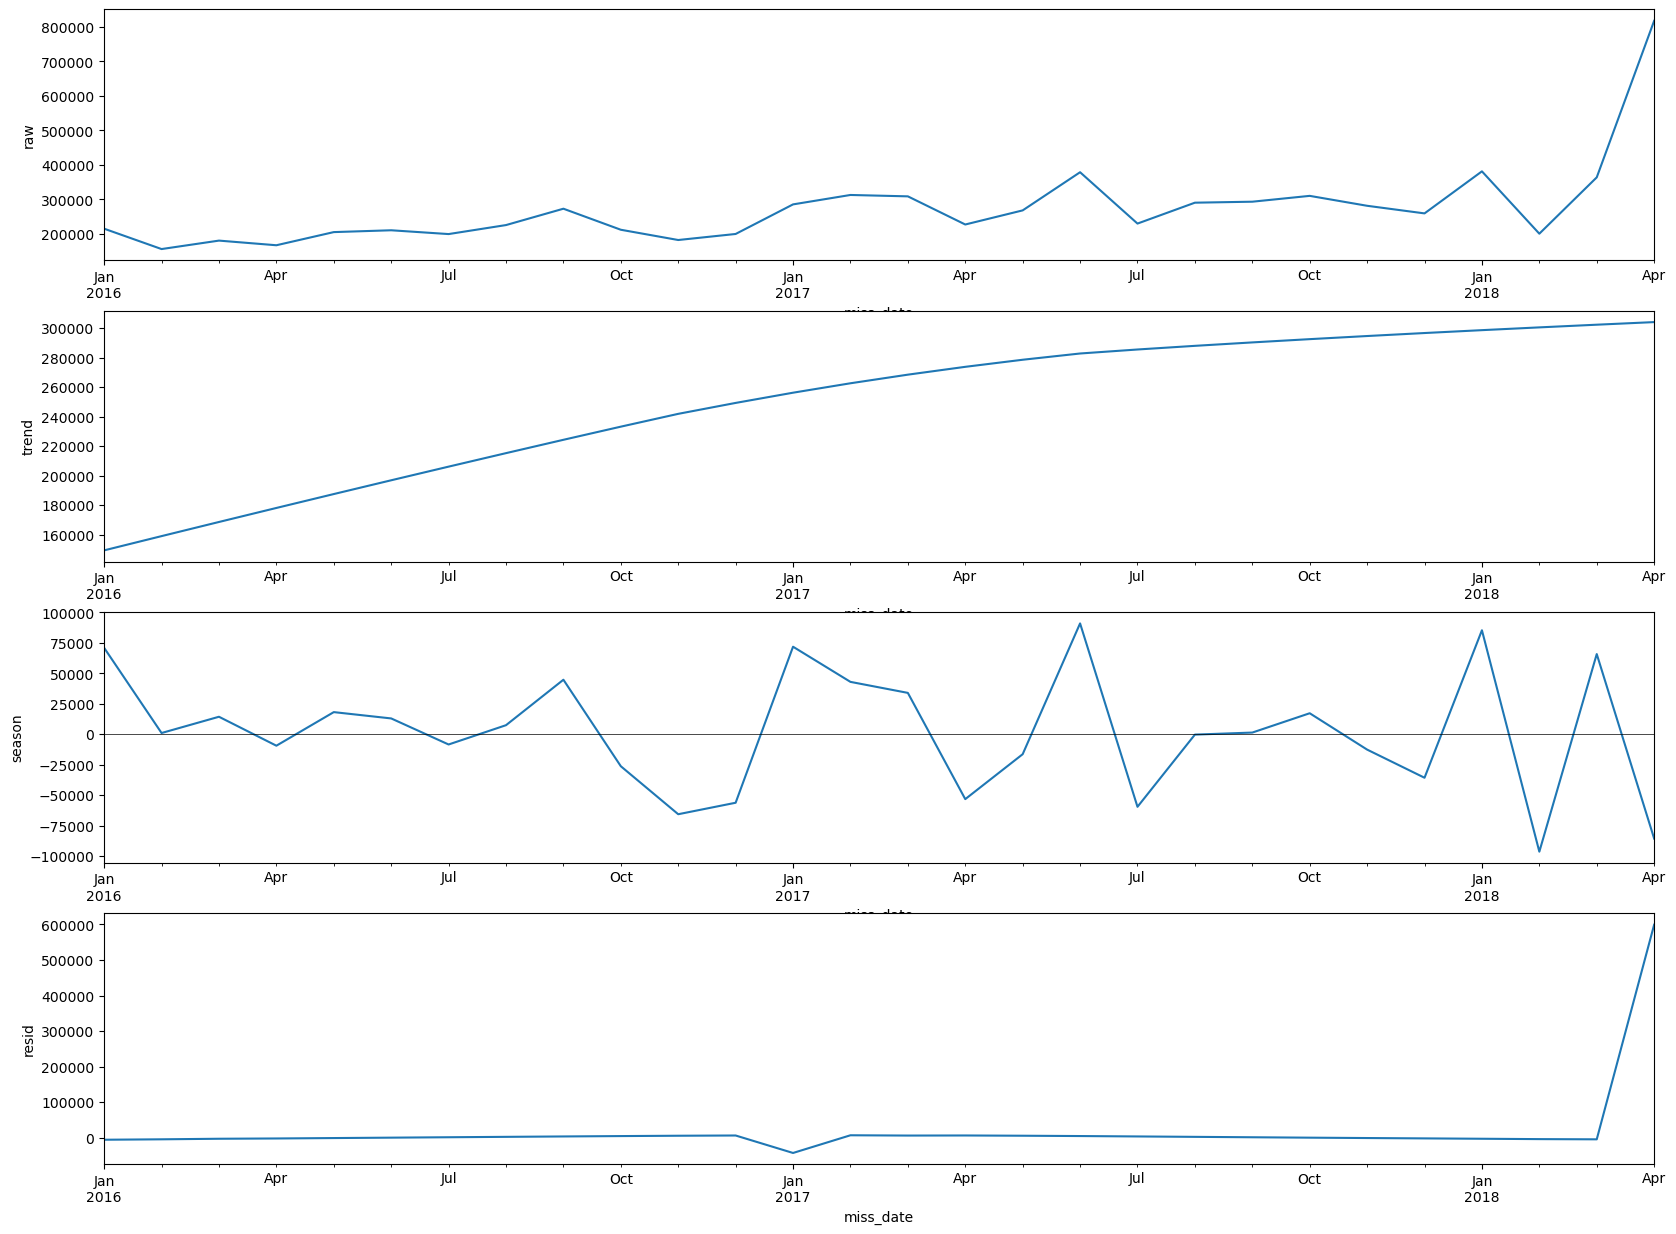

In [ ]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

stl = STL(series_week[:-35],
        seasonal=53,
        robust=True)
res = stl.fit()

fig, ax = plt.subplots(4,1, figsize=(20, 15))
series_week[:-35].plot(ax=ax[0])
ax[0].set_ylabel('raw')
res.trend.plot(ax=ax[1])
ax[1].set_ylabel('trend')
res.seasonal.plot(ax=ax[2])
ax[2].hlines(xmin=series_week.index[0], xmax=series_week.index[-36],
           y=0, color='k', linewidth=0.5)
ax[2].set_ylabel('season')
res.resid.plot(ax=ax[3])
ax[3].set_ylabel('resid')
plt.show()

stl = STL(series_month[:-8],
        seasonal=13,
        robust=True)
res = stl.fit()

fig, ax = plt.subplots(4,1, figsize=(20, 15))
series_month[:-8].plot(ax=ax[0])
ax[0].set_ylabel('raw')
res.trend.plot(ax=ax[1])
ax[1].set_ylabel('trend')
res.seasonal.plot(ax=ax[2])
ax[2].hlines(xmin=series_month.index[0], xmax=series_month.index[-9],
           y=0, color='k', linewidth=0.5)
ax[2].set_ylabel('season')
res.resid.plot(ax=ax[3])
ax[3].set_ylabel('resid')
plt.show()

### STL Decomposition Interpretation

STL separates:

- Long-term growth trend
- Recurring seasonal pattern
- Irregular fluctuations

This helps determine whether the series is dominated by trend or seasonality.

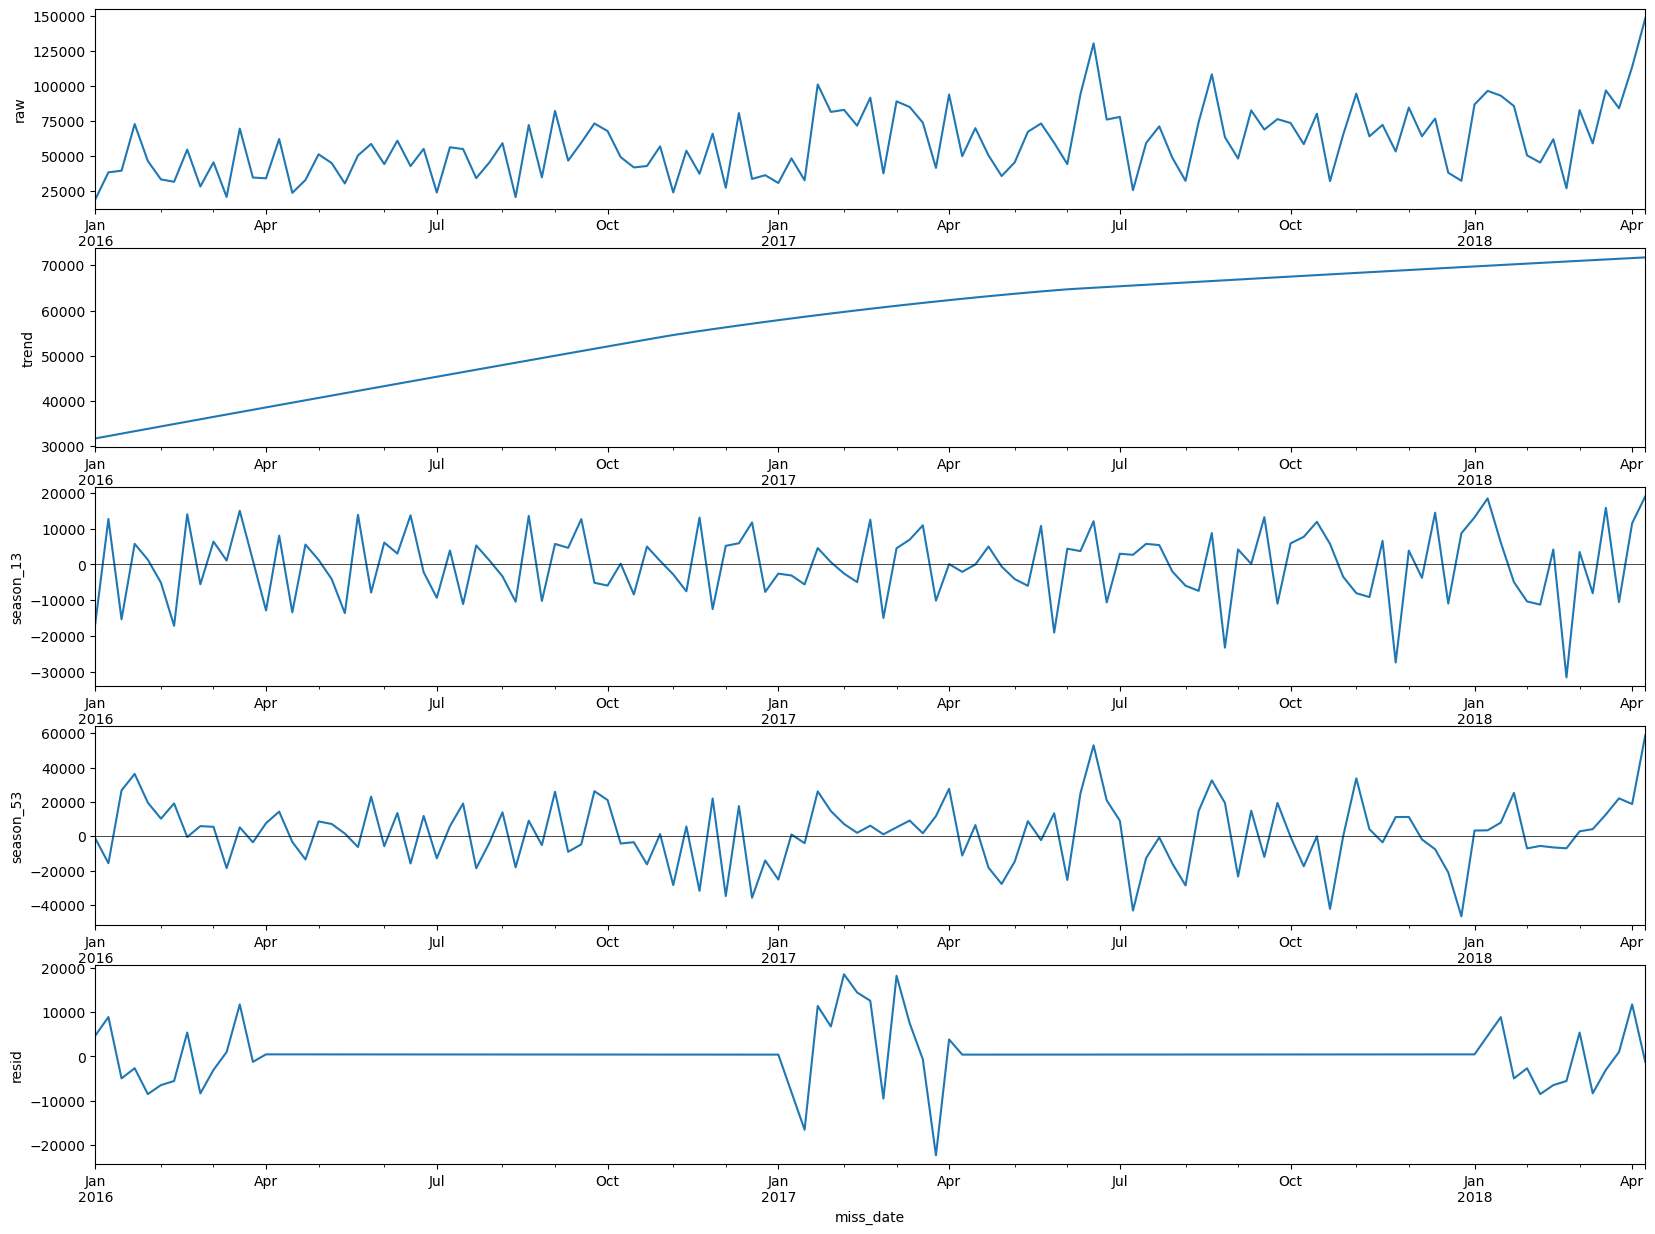

In [ ]:
from statsmodels.tsa.seasonal import MSTL
import matplotlib.pyplot as plt

mstl = MSTL(series_week[:-38], periods=(53, 13))
res = mstl.fit()

fig, ax = plt.subplots(5,1, figsize=(20, 15))
series_week[:-38].plot(ax=ax[0])
ax[0].set_ylabel('raw')
res.trend.plot(ax=ax[1])
ax[1].set_ylabel('trend')
res.seasonal.seasonal_13.plot(ax=ax[2])
ax[2].hlines(xmin=series_week.index[0], xmax=series_week.index[-36],
           y=0, color='k', linewidth=0.5)
ax[2].set_ylabel('season_13')
res.seasonal.seasonal_53.plot(ax=ax[3])
ax[3].hlines(xmin=series_week.index[0], xmax=series_week.index[-36],
           y=0, color='k', linewidth=0.5)
ax[3].set_ylabel('season_53')
res.resid.plot(ax=ax[4])
ax[4].set_ylabel('resid')
plt.show()

### MSTL – Multiple Seasonalities

MSTL extends STL by handling multiple seasonal cycles.

This is particularly useful when:
- Data contains weekly and monthly patterns
- Complex recurring structures exist

It improves decomposition accuracy for multi-period time series.

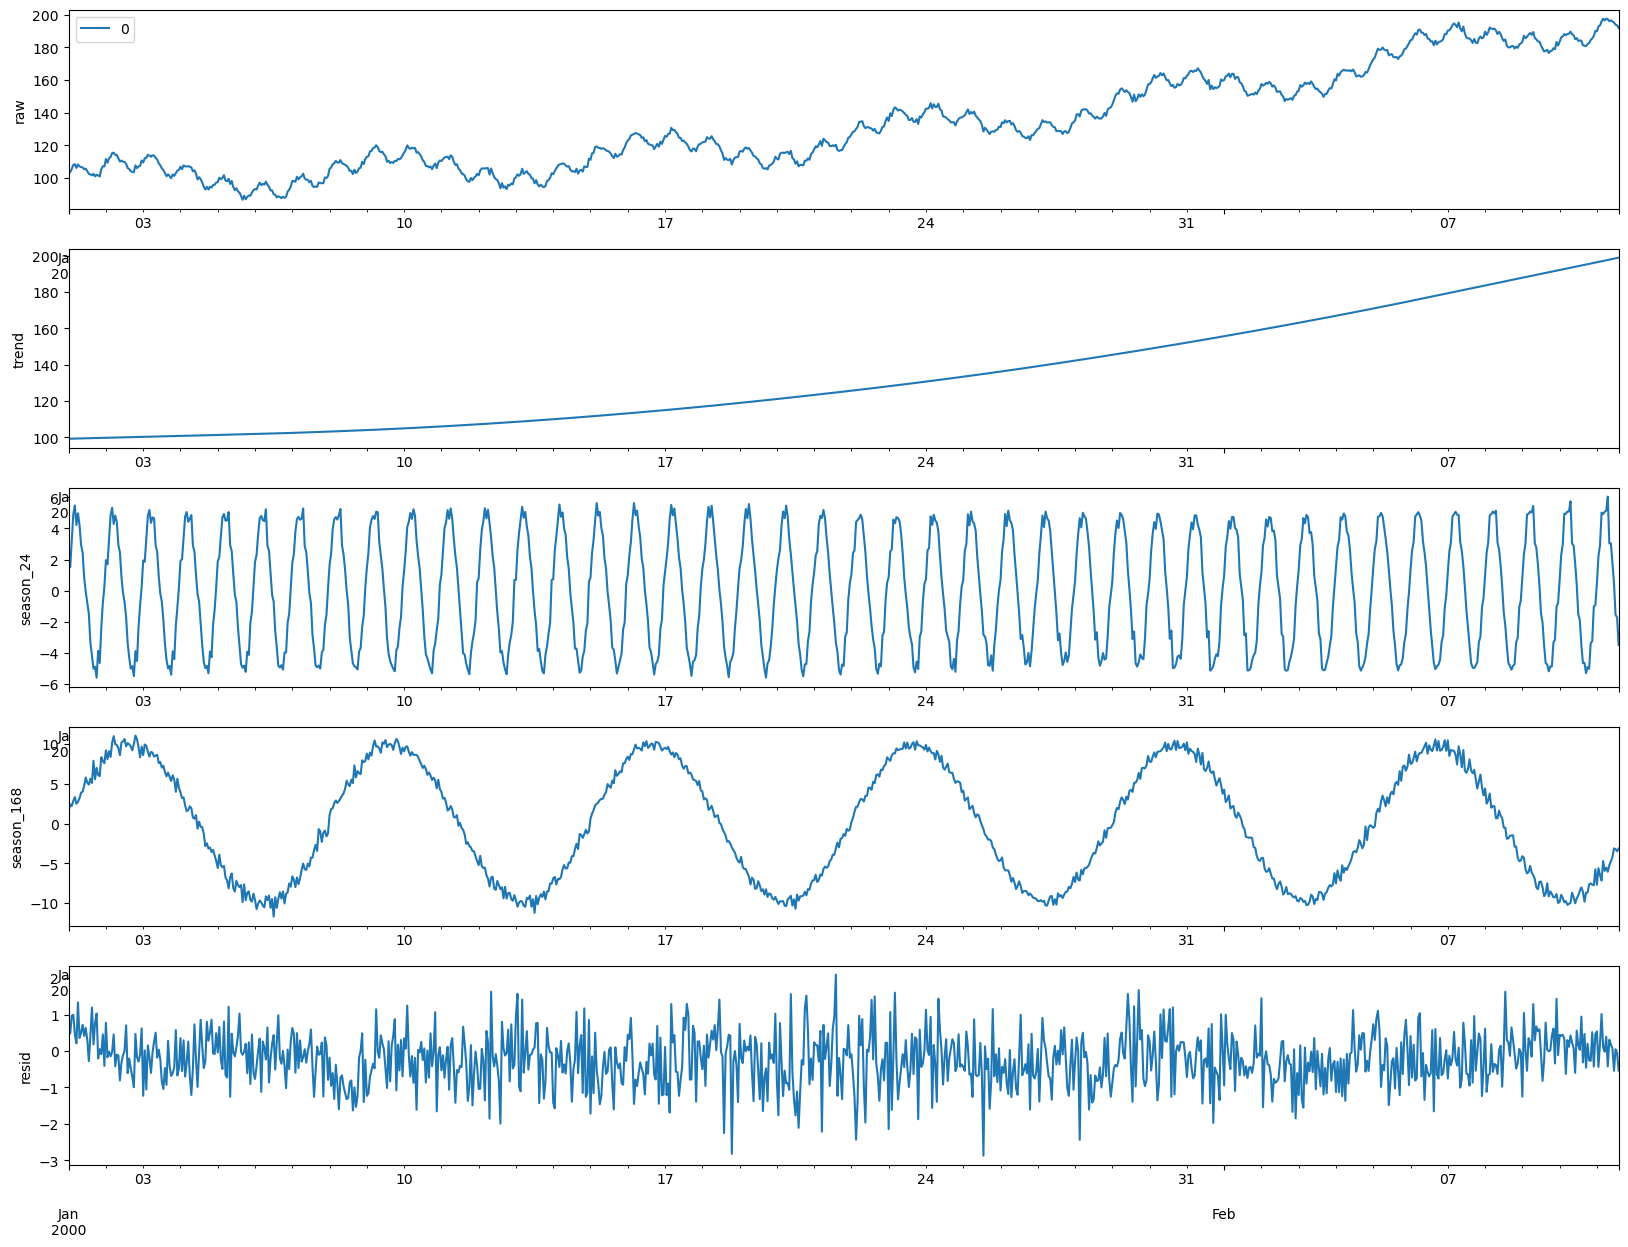

In [ ]:
pd.plotting.register_matplotlib_converters()
np.random.seed(0)
t = np.arange(1, 1000)
trend = 0.0001 * t ** 2 + 100
daily_seasonality = 5 * np.sin(2 * np.pi * t / 24)
weekly_seasonality = 10 * np.sin(2 * np.pi * t / (24 * 7))
noise = np.random.randn(len(t))
y = trend + daily_seasonality + weekly_seasonality + noise
index = pd.date_range(start='2000-01-01', periods=len(t), freq='H')
data = pd.DataFrame(data=y, index=index)

res = MSTL(data, periods=(24, 24*7)).fit()

fig, ax = plt.subplots(5,1, figsize=(20, 15))
data.plot(ax=ax[0])
ax[0].set_ylabel('raw')
res.trend.plot(ax=ax[1])
ax[1].set_ylabel('trend')
res.seasonal.seasonal_24.plot(ax=ax[2])
ax[2].set_ylabel('season_24')
res.seasonal.seasonal_168.plot(ax=ax[3])
ax[3].set_ylabel('season_168')
res.resid.plot(ax=ax[4])
ax[4].set_ylabel('resid')
plt.show()

# 6. Conclusions

Key outcomes:

- Linear trend estimation varies depending on implementation.
- Proper date transformation is essential in regression.
- One-hot encoding is safer for nominal categorical variables.
- Automated EDA tools accelerate initial data understanding.
- STL and MSTL provide valuable insights into seasonal structures.

This dataset is now prepared for predictive modeling and time-series forecasting.